In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 

import statsmodels.api as sm

In [2]:
df = pd.read_csv("LCData.csv")
df

,Unnamed: 0,def_flag,loan_amnt,int_rate,grade,emp_length_p,home_ownership,annual_inc,verification_status,purpose_p,...,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,open_acc,total_acc,total_rev_hi_lim,pub_rec,pub_rec_bankruptcies,addr_state,issue_d
0,70734,False,19000,10.15,2,4.0,MORTGAGE,90000.0,Not Verified,debt_consolidation,...,4,6,5,14,45,41500,0,0,NY,Oct-2014
1,166156,False,31500,17.57,4,10.0,MORTGAGE,145000.0,Verified,debt_consolidation,...,4,6,6,11,25,80100,0,0,MD,May-2014
2,201744,False,11975,14.64,3,4.0,MORTGAGE,45000.0,Source Verified,debt_consolidation,...,1,4,1,7,34,11000,0,0,IL,Mar-2014
3,166242,False,9000,14.16,3,10.0,RENT,48000.0,Source Verified,other,...,3,6,3,9,16,35700,1,1,NY,May-2014
4,141351,False,6600,6.03,1,0.0,RENT,58000.0,Not Verified,credit_card,...,4,4,4,9,28,37200,0,0,TX,Jun-2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157080,117769,False,6500,11.67,2,8.0,MORTGAGE,30000.0,Not Verified,debt_consolidation,...,4,9,4,12,17,13900,0,0,NC,Jul-2014
157081,136544,False,19200,16.99,4,10.0,MORTGAGE,250700.0,Source Verified,debt_consolidation,...,1,8,2,16,33,208500,0,0,KS,Jun-2014
157082,35225,False,6500,11.67,2,10.0,MORTGAGE,46000.0,Source Verified,credit_card,...,2,3,3,9,25,32800,0,0,TX,Oct-2014
157083,76486,False,10000,12.99,3,2.0,MORTGAGE,40000.0,Not Verified,credit_card,...,6,10,6,19,33,20400,0,0,IL,Sep-2014


In [3]:
# df['addr_state'].value_counts()

(array([ 7054.,  9940., 12045.,  8597., 25348., 28291., 30057., 18842.,
        11362.,  5549.]),
 array([1.79175947, 1.93862368, 2.08548789, 2.2323521 , 2.37921631,
        2.52608052, 2.67294473, 2.81980894, 2.96667315, 3.11353736,
        3.26040157]),
 <BarContainer object of 10 artists>)

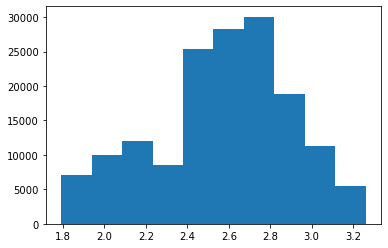

In [4]:
# df["emp_length_p"].value_counts()
#df['chargeoff_within_12_mths'].value_counts()
plt.hist(np.log(df['int_rate']))

(array([ 4184., 12915., 21856., 27911., 28176., 23987., 18586., 11791.,
         5866.,  1813.]),
 array([ 0.   ,  3.999,  7.998, 11.997, 15.996, 19.995, 23.994, 27.993,
        31.992, 35.991, 39.99 ]),
 <BarContainer object of 10 artists>)

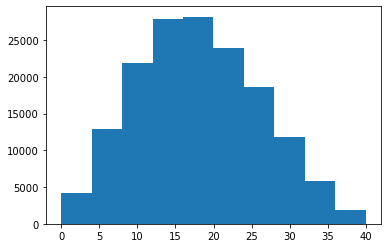

In [5]:
df['avg_cur_bal'].isnull().values.any()
df['grade'].value_counts()
plt.hist(df['dti'])

In [6]:
df2 = df[['loan_amnt', 'emp_length_p', 'home_ownership', 'annual_inc', 'purpose_p', 'avg_cur_bal', 'def_flag', 'grade', 'dti', 'int_rate', 'chargeoff_within_12_mths']].copy()

In [7]:
df2

,loan_amnt,emp_length_p,home_ownership,annual_inc,purpose_p,avg_cur_bal,def_flag,grade,dti,int_rate,chargeoff_within_12_mths
0,19000,4.0,MORTGAGE,90000.0,debt_consolidation,10627.0,False,2,14.69,10.15,0
1,31500,10.0,MORTGAGE,145000.0,debt_consolidation,35563.0,False,4,6.47,17.57,0
2,11975,4.0,MORTGAGE,45000.0,debt_consolidation,26828.0,False,3,15.55,14.64,0
3,9000,10.0,RENT,48000.0,other,3197.0,False,3,27.31,14.16,0
4,6600,0.0,RENT,58000.0,credit_card,13183.0,False,1,21.61,6.03,0
...,...,...,...,...,...,...,...,...,...,...,...
157080,6500,8.0,MORTGAGE,30000.0,debt_consolidation,11059.0,False,2,13.88,11.67,0
157081,19200,10.0,MORTGAGE,250700.0,debt_consolidation,40228.0,False,4,14.70,16.99,0
157082,6500,10.0,MORTGAGE,46000.0,credit_card,27473.0,False,2,27.55,11.67,0
157083,10000,2.0,MORTGAGE,40000.0,credit_card,7310.0,False,3,23.16,12.99,0


(array([10290., 23143., 29797., 22492., 19857., 19480.,  8558.,  9932.,
         4984.,  8552.]),
 array([ 1000.,  4400.,  7800., 11200., 14600., 18000., 21400., 24800.,
        28200., 31600., 35000.]),
 <BarContainer object of 10 artists>)

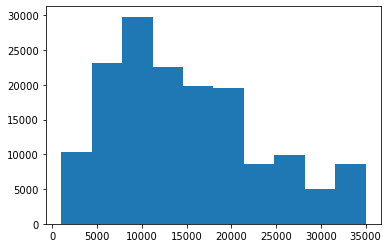

In [8]:
plt.hist(df2['loan_amnt'])

In [9]:
df2['log_loan_amnt'] = np.log(df2['loan_amnt'])
# plt.hist(df2['log_loan_amnt'])

(array([1.52168e+05, 4.40500e+03, 3.99000e+02, 6.60000e+01, 1.90000e+01,
        1.40000e+01, 5.00000e+00, 2.00000e+00, 1.00000e+00, 2.00000e+00]),
 array([     0. ,  49748.4,  99496.8, 149245.2, 198993.6, 248742. ,
        298490.4, 348238.8, 397987.2, 447735.6, 497484. ]),
 <BarContainer object of 10 artists>)

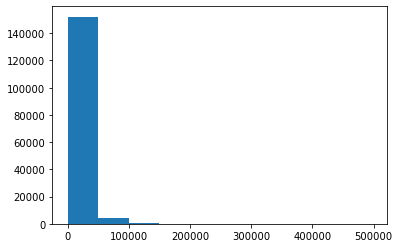

In [10]:
plt.hist(df2['avg_cur_bal'])

(array([2.7000e+01, 1.0000e+01, 3.4000e+01, 1.5600e+02, 2.9980e+03,
        2.8544e+04, 5.6192e+04, 5.7453e+04, 1.1493e+04, 1.7400e+02]),
 array([ 0.        ,  1.31173187,  2.62346373,  3.9351956 ,  5.24692747,
         6.55865934,  7.8703912 ,  9.18212307, 10.49385494, 11.80558681,
        13.11731867]),
 <BarContainer object of 10 artists>)

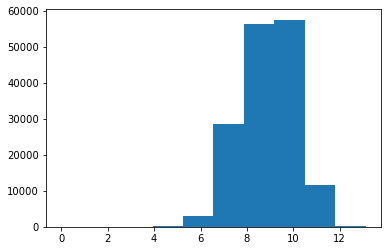

In [11]:
df2['log_avg_cur_bal'] = np.log(df2['avg_cur_bal'], out=np.zeros_like(df2['avg_cur_bal']), where=(df2['avg_cur_bal']!=0))
plt.hist(df2['log_avg_cur_bal'])

(array([1.57037e+05, 4.20000e+01, 4.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([3.0000e+03, 7.5270e+05, 1.5024e+06, 2.2521e+06, 3.0018e+06,
        3.7515e+06, 4.5012e+06, 5.2509e+06, 6.0006e+06, 6.7503e+06,
        7.5000e+06]),
 <BarContainer object of 10 artists>)

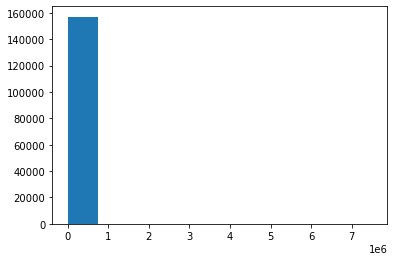

In [12]:
plt.hist(df2['annual_inc'])

(array([5.0000e+00, 4.6700e+02, 1.1467e+04, 7.4636e+04, 6.1600e+04,
        8.2880e+03, 5.6700e+02, 4.9000e+01, 4.0000e+00, 2.0000e+00]),
 array([ 8.00636757,  8.78877217,  9.57117677, 10.35358137, 11.13598597,
        11.91839057, 12.70079517, 13.48319978, 14.26560438, 15.04800898,
        15.83041358]),
 <BarContainer object of 10 artists>)

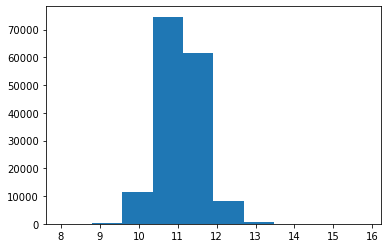

In [13]:
df2['log_annual_inc'] = np.log(df2['annual_inc'], out=np.zeros_like(df2['annual_inc']), where=(df2['annual_inc']!=0))
plt.hist(df2['log_annual_inc'])

In [14]:
# df2['chargeoff_within_12_mths'].value_counts()
# df2['chargeoff'] = df2['chargeoff_within_12_mths'].map({0:0, 1:1, 2:1, 3:1, 4:1, 5:1, 6:1, 7:1})

In [15]:
# plt.hist(df2['emp_length_p'])

In [16]:
df2['log_int_rate'] = np.log(df2['int_rate'])

In [17]:
df2['mortgage'] = df2['home_ownership'].map({"MORTGAGE": 1, "RENT":0, "OWN":0, "OTHER":0})

In [18]:
df2['rent'] = df2['home_ownership'].map({"MORTGAGE": 0, "RENT":1, "OWN":0, "OTHER":0})

In [19]:
df2['own'] = df2['home_ownership'].map({"MORTGAGE": 0, "RENT":0, "OWN":1, "OTHER":0})

In [20]:
df2['purpose_p'].value_counts()

debt_consolidation    95447
credit_card           37066
home_improvement       8642
other                  7471
major_purchase         2555
medical                1568
small_business         1493
car                    1211
moving                  850
vacation                782
Name: purpose_p, dtype: int64

In [21]:
# df_purpose = pd.get_dummies(df2["purpose_p"])
# df2 = pd.concat([df2, df_purpose], axis=1)

In [22]:
df2['debt_consolidation'] = df2['purpose_p'].map({'debt_consolidation':1,
                                                 'credit_card':0,
                                                 'home_improvement':0,
                                                 'other':0,
                                                 'major_purchase':0,
                                                 'medical':0,
                                                 'small_business':0,
                                                 'car':0,
                                                 'moving':0,
                                                 'vacation':0})

In [23]:
df2['credit_card'] = df2['purpose_p'].map({'debt_consolidation':0,
                                                 'credit_card':1,
                                                 'home_improvement':0,
                                                 'other':0,
                                                 'major_purchase':0,
                                                 'medical':0,
                                                 'small_business':0,
                                                 'car':0,
                                                 'moving':0,
                                                 'vacation':0})

In [24]:
df2['def_flag'] = df2['def_flag'].map({False:0, True:1})

In [25]:
df2.head()

,loan_amnt,emp_length_p,home_ownership,annual_inc,purpose_p,avg_cur_bal,def_flag,grade,dti,int_rate,chargeoff_within_12_mths,log_loan_amnt,log_avg_cur_bal,log_annual_inc,log_int_rate,mortgage,rent,own,debt_consolidation,credit_card
0,19000,4.0,MORTGAGE,90000.0,debt_consolidation,10627.0,0,2,14.69,10.15,0,9.852194,9.271153,11.407565,2.317474,1,0,0,1,0
1,31500,10.0,MORTGAGE,145000.0,debt_consolidation,35563.0,0,4,6.47,17.57,0,10.357743,10.479061,11.884489,2.866193,1,0,0,1,0
2,11975,4.0,MORTGAGE,45000.0,debt_consolidation,26828.0,0,3,15.55,14.64,0,9.390576,10.197201,10.714418,2.683758,1,0,0,1,0
3,9000,10.0,RENT,48000.0,other,3197.0,0,3,27.31,14.16,0,9.104980,8.069968,10.778956,2.650421,0,1,0,0,0
4,6600,0.0,RENT,58000.0,credit_card,13183.0,0,1,21.61,6.03,0,8.794825,9.486683,10.968198,1.796747,0,1,0,0,1


In [26]:
df2 = df2.drop(['loan_amnt', 'home_ownership', 'annual_inc', 'purpose_p', 'avg_cur_bal'], axis=1)


In [27]:
df2 = df2[['def_flag', 'emp_length_p', 'log_loan_amnt', 'log_annual_inc', 'log_avg_cur_bal', 'grade', 'log_int_rate']]
# df2

In [28]:
df2['employed'] = df2['emp_length_p'].map({np.nan:0, 0.0:1, 1.0:1, 2.0:1, 3.0:1, 4.0:1, 5.0:1, 6.0:1, 7.0:1, 8.0:1, 9.0:1, 10.0:1})
# df_emp = pd.get_dummies(df2["emp_length_p"])
# df2 = pd.concat([df2, df_emp], axis=1)
df_grade = pd.get_dummies(df2['grade'])
df2 = pd.concat([df2, df_grade], axis=1)
# df_state = pd.get_dummies(df2['addr_state'])
# df2 = pd.concat([df2, df_state], axis=1)

In [29]:
df2 = df2.drop(['emp_length_p', 'grade', 1], axis = 1)
df2

,def_flag,log_loan_amnt,log_annual_inc,log_avg_cur_bal,log_int_rate,employed,2,3,4,5,6,7
0,0,9.852194,11.407565,9.271153,2.317474,1,1,0,0,0,0,0
1,0,10.357743,11.884489,10.479061,2.866193,1,0,0,1,0,0,0
2,0,9.390576,10.714418,10.197201,2.683758,1,0,1,0,0,0,0
3,0,9.104980,10.778956,8.069968,2.650421,1,0,1,0,0,0,0
4,0,8.794825,10.968198,9.486683,1.796747,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
157080,0,8.779557,10.308953,9.311000,2.457021,1,1,0,0,0,0,0
157081,0,9.862666,12.432012,10.602319,2.832625,1,0,0,1,0,0,0
157082,0,8.779557,10.736397,10.220959,2.457021,1,1,0,0,0,0,0
157083,0,9.210340,10.596635,8.896999,2.564180,1,0,1,0,0,0,0


In [30]:
# df2['employed'].value_counts()
# df2['log_avg_cur_bal'].isnull().values.any()
df2 = df2.dropna()

In [31]:
X_train, X_test, y_train, y_test = train_test_split(df2.drop('def_flag', axis=1),
                                                    df2['def_flag'],
                                                    test_size=1/3)

In [32]:
Model1 = LogisticRegression(solver='newton-cg') # googled the most suitable solver for large dataset
Model1.fit(X_train, y_train)

LogisticRegression(solver='newton-cg')

In [33]:
# Model1.score(X_test, y_test)

In [34]:
# test set
y_pred_prob = Model1.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_prob)
# training set
y_train_pred_prob = Model1.predict_proba(X_train)[::,1]
fpr_train, tpr_train, _ = metrics.roc_curve(y_train,  y_train_pred_prob)

In [35]:
# test set
auc = metrics.roc_auc_score(y_test, y_pred_prob)
# train set
auc_train = metrics.roc_auc_score(y_train, y_train_pred_prob)
auc, auc_train

(0.6769560699712989, 0.6748867244802101)

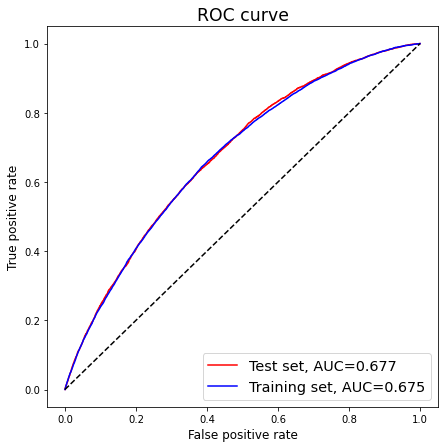

In [36]:
plt.figure(figsize = (7, 7))
plt.plot(fpr, tpr, c = 'r', label=f'Test set, AUC={round(auc, 3)}')
plt.plot(fpr_train, tpr_train, c = 'b', label=f'Training set, AUC={round(auc_train, 3)}')
plt.plot(np.linspace(0,1,2), np.linspace(0,1,2), c = 'k', ls = '--')
plt.title('ROC curve', fontsize='xx-large')
plt.xlabel('False positive rate', fontsize='large')
plt.ylabel('True positive rate', fontsize='large')
plt.legend(loc=4, fontsize='x-large')
plt.show()

In [37]:
x = sm.add_constant(X_train)
reg_log = sm.Logit(y_train, x)
results_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.345227
         Iterations 7


In [38]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               def_flag   No. Observations:               104720
Model:                          Logit   Df Residuals:                   104708
Method:                           MLE   Df Model:                           11
Date:                Mon, 12 Jun 2023   Pseudo R-squ.:                 0.05583
Time:                        22:38:13   Log-Likelihood:                -36152.
converged:                       True   LL-Null:                       -38290.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.8241      0.338     -8.360      0.000      -3.486      -2.162
log_loan_amnt       0.1949      0.018     10.797      0.000       0.160       0.230
log_annual_inc     -0.3298      0.025    -13.337      0.000      -0.378      -0.281
log_avg_cur_bal    -0.1106      0.009    -11.659      0.000      -0.129      -0.092
log_int_rate        1.2933      0.126     10.268      0.000       1.046       1.540
employed           -0.1822      0.041     -4.495      0.000      -0.262      -0.103
2                   0.1969      0.069      2.846      0.004       0.061       0.332
3                   0.3659      0.091      4.014      0.000       0.187       0.545
4                   0.4595      0.113      4.074      0.000       0.238       0.681
5                   0.5740      0.134      4.288      0.000       0.312       0.836
6                   0.5735      0.159      3.617      0.000       0.263       0.884
7                   0.7409      0.179      4.144      0.000       0.390       1.091
===================================================================================
"""

In [39]:
# print(Model1.coef_, Model1.intercept_)

In [40]:
results_log.pvalues

const              6.285199e-17
log_loan_amnt      3.541065e-27
log_annual_inc     1.415788e-40
log_avg_cur_bal    2.073707e-31
log_int_rate       9.784911e-25
employed           6.963313e-06
2                  4.425175e-03
3                  5.978159e-05
4                  4.628783e-05
5                  1.803043e-05
6                  2.978220e-04
7                  3.413226e-05
dtype: float64

In [41]:
results_log.aic

72328.32081530135

In [42]:
np.corrcoef(df2['log_loan_amnt'], df2['log_avg_cur_bal'])[0][1]

0.2963192102650314

In [43]:
np.corrcoef(df2['log_loan_amnt'], df2['log_annual_inc'])[0][1]

0.48566619119211346

In [44]:
np.corrcoef(df2['log_loan_amnt'], df2['log_int_rate'])[0][1]

0.06373234458837297

In [45]:
np.corrcoef(df2['log_annual_inc'], df2['log_avg_cur_bal'])[0][1]

0.4822237111912781

In [46]:
np.corrcoef(df2['log_annual_inc'], df2['log_int_rate'])[0][1]

-0.13444330369502291

In [47]:
np.corrcoef(df2['log_avg_cur_bal'], df2['log_int_rate'])[0][1]

-0.08427134163235603

In [48]:
y_pred = Model1.predict(X_test)
conf_mat = metrics.confusion_matrix(y_test, y_pred)
conf_mat

array([[46075,     3],
       [ 6283,     0]], dtype=int64)

In [49]:
(conf_mat[0][0]+conf_mat[1][1])/sum(sum(conf_mat))

0.8799488168675159

In [50]:
arr = tpr - fpr
index = np.where(arr==max(arr))[0][0]
KS = max(arr)
cut_off = fpr[index]
KS, cut_off

(0.2545323001941563, 0.37271582968010764)

In [51]:
y_pred2 = np.zeros_like(y_pred_prob)
for i in range(len(y_pred2)):
    if y_pred_prob[i] > cut_off:
        y_pred2[i] = 1
conf_mat2 = metrics.confusion_matrix(y_test, y_pred2)
conf_mat2

array([[46040,    38],
       [ 6257,    26]], dtype=int64)

In [52]:
(conf_mat2[0][0]+conf_mat2[1][1])/sum(sum(conf_mat2))

0.8797769332136514

In [53]:
y_train_pred = Model1.predict(X_train)
conf_mat_train = metrics.confusion_matrix(y_train, y_train_pred)
conf_mat_train

array([[92218,     3],
       [12497,     2]], dtype=int64)

In [54]:
(conf_mat_train[0][0]+conf_mat_train[1][1])/sum(sum(conf_mat_train))

0.8806340718105424

In [55]:
arr2 = tpr_train - fpr_train
index = np.where(arr2==max(arr2))[0][0]
KS2 = max(arr2)
cut_off2 = fpr_train[index]
KS2, cut_off2

(0.2589302434855267, 0.3846412422333308)

In [56]:
y_train_pred2 = np.zeros_like(y_train_pred_prob)
for i in range(len(y_train_pred2)):
    if y_train_pred_prob[i] > cut_off2:
        y_train_pred2[i] = 1
conf_mat_train2 = metrics.confusion_matrix(y_train, y_train_pred2)
conf_mat_train2

array([[92160,    61],
       [12473,    26]], dtype=int64)

In [57]:
(conf_mat_train2[0][0]+conf_mat_train2[1][1])/sum(sum(conf_mat_train2))

0.880309396485867